In [1]:
# MNIST
import torch.nn as nn

class MnistClassifier(nn.Module):
  def __init__(self):
    super(MnistClassifier, self).__init__()
    self.fc1 = nn.Linear(in_features=784, out_features=16)
    self.fc_act1 = nn.ReLU()
    self.fc2 = nn.Linear(in_features=16, out_features=32)
    self.fc_act2 = nn.ReLU()
    self.fc3 = nn.Linear(in_features=32, out_features=10)

  def forward(self, x):
    x = self.fc1(x)
    x = self.fc_act1(x)
    x = self.fc2(x)
    x = self.fc_act2(x)
    x = self.fc3(x)

    return x


In [2]:
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


def get_dataset(BATCH_SIZE):
  dataset = MNIST(root='data', train=True, download=True, transform=ToTensor())
  N_DATA = len(dataset)
  data_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
  return data_loader, N_DATA

def get_device():
  if torch.cuda.is_available():DEVICE = 'cuda'
  elif torch.backends.mps.is_available(): DEVICE = 'mps'
  else: DEVICE = 'cpu'
  return DEVICE

def train(data_loader, model, loss_function, BATCH_SIZE, N_DATA, optimizer, DEVICE):
  epoch_loss, n_corrects = 0., 0
  for X, y in data_loader:
    X, y = X.to(DEVICE), y.to(DEVICE)
    X = X.reshape(BATCH_SIZE, -1)

    pred = model.forward(X)
    loss = loss_function(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item() * len(X)
    pred = torch.argmax(pred, dim=1)
    n_corrects += (pred == y).sum().item()

  epoch_loss /= N_DATA
  epoch_acc = n_corrects / N_DATA

  return epoch_loss, epoch_acc

def vis_losses_accs(losses, accs):
  fig, axes = plt.subplots(2, 1, figsize=(7, 14))
  axes[0].plot(losses)
  axes[0].set_ylabel('BCELoss')
  axes[1].plot(accs)
  axes[1].set_ylabel('Accuracy')
  axes[1].set_xlabel('Epoch')

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 9912422/9912422 [00:00<00:00, 33836796.10it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 6125389.05it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 16541712.26it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19479068.27it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 50/50 [05:30<00:00,  6.60s/it]


Loss : 0.09901480001037319, Accuracy : 0.9715833333333334



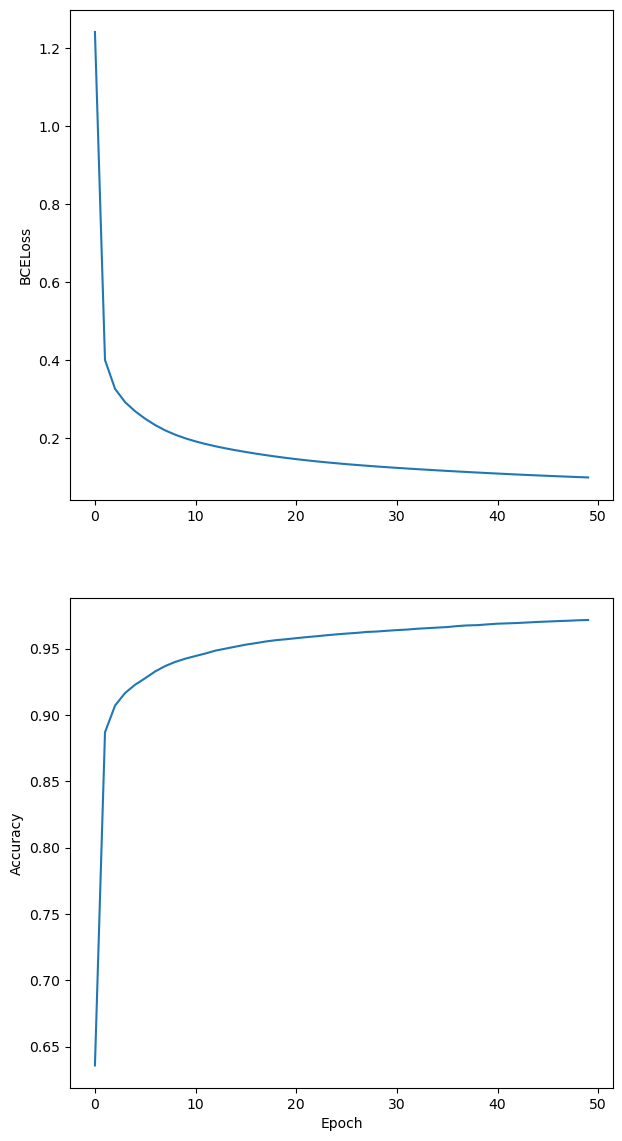

In [3]:
from torch.optim import SGD
from tqdm import tqdm

BATCH_SIZE = 32
EPOCHS = 50
LR = 0.01
pbar = tqdm(range(EPOCHS))

data_loader, N_DATA = get_dataset(BATCH_SIZE)
DEVICE = get_device()

model = MnistClassifier().to(DEVICE)
loss_function = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=LR)

losses, accs = [], []
for epoch in pbar:
  epoch_loss, epoch_acc = train(data_loader, model, loss_function, BATCH_SIZE, N_DATA, optimizer, DEVICE)
  losses.append(epoch_loss)
  accs.append(epoch_acc)
pbar.close()

vis_losses_accs(losses, accs)
print(f'Loss : {losses[-1]}, Accuracy : {accs[-1]}\n')
